# STA 365 HW 2

Q1

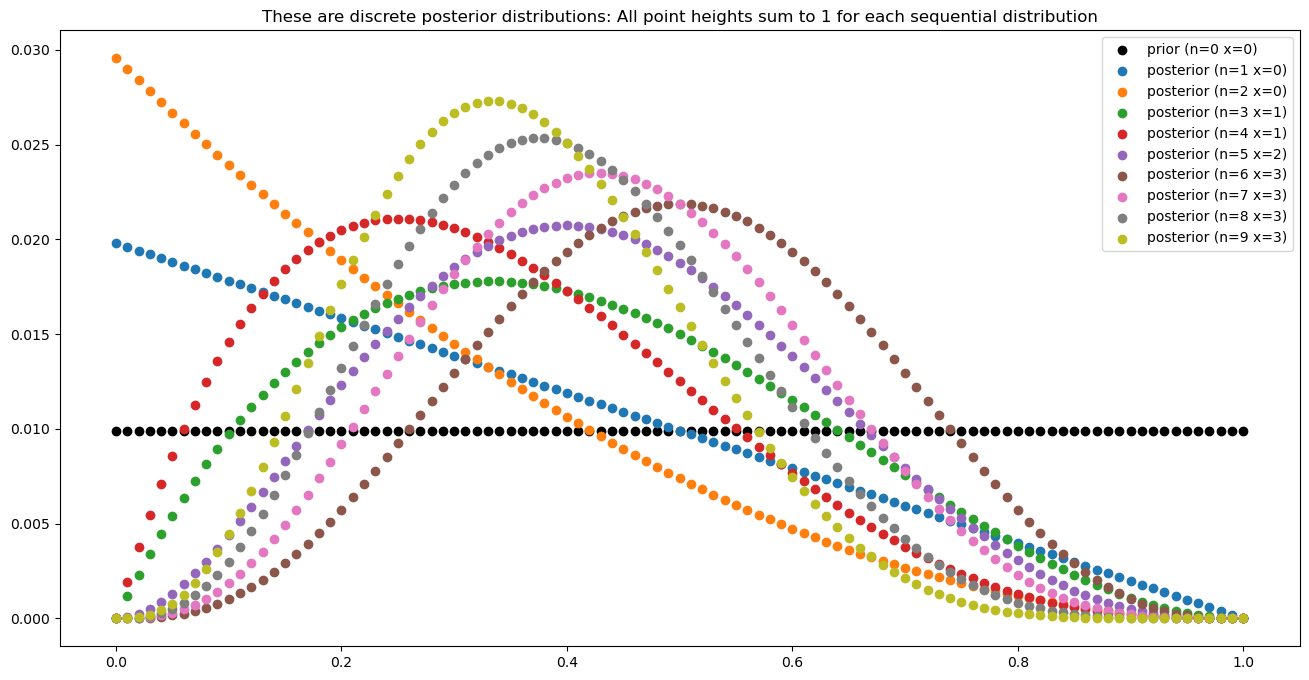

In [2]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    likelihood = stats.binom.pmf(x , n , parameter_domain)
    posterior = prior * likelihood
    posterior = posterior/posterior.sum()
    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update
    pior = posterior
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();
plt.show()

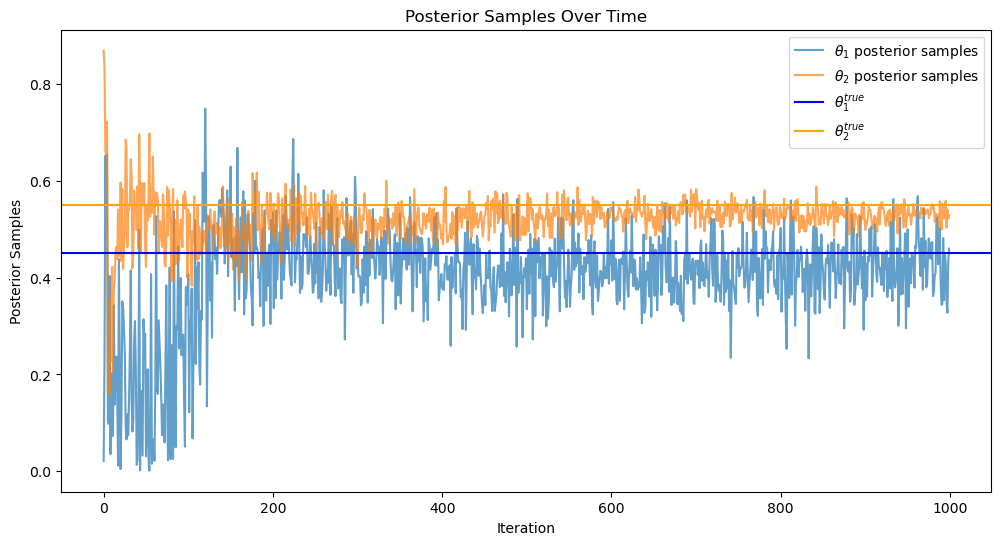

In [11]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt


alpha1, beta1 = 1, 1  # Prior for arm 1
alpha2, beta2 = 1, 1  # Prior for arm 2

n1, x1 = 0, 0  # Counts for arm 1
n2, x2 = 0, 0  # Counts for arm 2

theta1_true, theta2_true = 0.45, 0.55  # True success probabilities
m = 1000  # Number of iterations

# Track progress for visualization
posterior_samples_arm1 = []
posterior_samples_arm2 = []

# Simulation
for t in range(m):
    # Sample from the posterior distributions
    theta1_sample = beta.rvs(alpha1 + x1, beta1 + n1 - x1)
    theta2_sample = beta.rvs(alpha2 + x2, beta2 + n2 - x2)

    # Decide which arm to pull
    if theta1_sample < theta2_sample:
        reward = np.random.rand() < theta2_true  # Pull arm 2
        n2 += 1
        x2 += reward
    else:
        reward = np.random.rand() < theta1_true  # Pull arm 1
        n1 += 1
        x1 += reward

    # Store samples for visualization
    posterior_samples_arm1.append(beta.rvs(alpha1 + x1, beta1 + n1 - x1))
    posterior_samples_arm2.append(beta.rvs(alpha2 + x2, beta2 + n2 - x2))


# Plot the posterior distributions
plt.figure(figsize=(12, 6))
plt.plot(range(m), posterior_samples_arm1, label=r"$\theta_1$ posterior samples", alpha=0.7)
plt.plot(range(m), posterior_samples_arm2, label=r"$\theta_2$ posterior samples", alpha=0.7)
plt.axhline(theta1_true, color='blue', label=r"$\theta_1^{true}$")
plt.axhline(theta2_true, color='orange', label=r"$\theta_2^{true}$")
plt.xlabel("Iteration")
plt.ylabel("Posterior Samples")
plt.legend()
plt.title("Posterior Samples Over Time")
plt.show()


Q3. If the entities could share some similar characteristics and may not be independent, then the second approach is better. However, if they seem to be independent, the first approach is better. For sparse data, the Dirichlet-Multinomial model can leverage shared information to improve estimates.

Scenario:

A company is testing three different website layouts (A, B, and C) to maximize user engagement (e.g. number of clicks). The goal is to determine which layout performs best while efficiently allocating users to the layouts during the test.

At the start of the test, allocate equal traffic to all three layouts to gather initial data.
Update posterior probabilities (independently or jointly, depending on the model).
As the test progresses:
If Analysis 1 is used: Allocate more traffic to the layout that independently shows higher engagement.
If Analysis 2 is used: Allocate traffic based on the joint analysis, leveraging shared insights to make more informed decisions.
